<a href="https://colab.research.google.com/github/Julio21-ai/NLP-GPO10/blob/main/5.2%20Vectores%20Embebidos%20Pre-entrenados/MNA_NLP_semana_5_Actividad_Embeddings_abril_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)
# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Actividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   **Julio Baltazar Colín: A01794476**
*   Elemento de lista



In [279]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Instalar el paquete contractions
!pip install contractions

import nltk
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##**Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [280]:
#carga de datos desde un repositorio externo:

import requests
urlAmzn = 'https://raw.githubusercontent.com/Julio21-ai/NLP-GPO10/main/5.2%20Vectores%20Embebidos%20Pre-entrenados/amazon5.txt'
urlimdb = 'https://raw.githubusercontent.com/Julio21-ai/NLP-GPO10/main/5.2%20Vectores%20Embebidos%20Pre-entrenados/imdb5.txt'
urlyelp = 'https://raw.githubusercontent.com/Julio21-ai/NLP-GPO10/main/3.2%20Actividad%202/yelp_labelled.txt'

responce_amzn = requests.get(urlAmzn)
responce_imdb = requests.get(urlimdb)
responce_urlyelp = requests.get(urlyelp)

data_amzn = None
data_imdb= None
data_urlyelp= None

if responce_amzn.status_code == 200: #200 = OK
    data_amzn = responce_amzn.text
else:
    print("Error al obtener el archivo:", responce_amzn.status_code)

if responce_imdb.status_code == 200: #200 = OK
    data_imdb = responce_imdb.text
else:
    print("Error al obtener el archivo:", responce_imdb.status_code)

if responce_urlyelp.status_code == 200: #200 = OK
    data_urlyelp = responce_urlyelp.text
else:
    print("Error al obtener el archivo:", responce_imdb.status_code)


In [281]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
from io import StringIO

dfa = pd.read_csv(StringIO(data_amzn), sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv(StringIO(data_imdb), delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv(StringIO(data_urlyelp), sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

df = pd.concat([dfa, dfi, dfy], ignore_index=True)
print('Total de registros dataframe df:',df.shape)

# *********** Aquí termina la sección de agregar código *************


Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (1000, 2)
Total de registros de Yelp: (1000, 2)
Total de registros dataframe df: (3000, 2)


In [282]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  3000 non-null   object 
 1   label   2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [283]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0.0
1,"Good case, Excellent value.",1.0
2,Great for the jawbone.,1.0
3,Tied to charger for conversations lasting more...,0.0
4,The mic is great.,1.0


##**Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [284]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
def remover_espacios_extra(texto):
    # Eliminar los espacios iniciales y finales y dividir el texto por espacios
    texto_filtrado = re.sub(r'\s+', ' ', texto).strip().split()
    # texto_filtrado las palabras con un solo espacio
    retval = ' '.join(texto_filtrado)
    return retval

def procesar_comilla(texto):
    texto_filtrado = texto
    # Eliminar terminaciones 's
    texto_filtrado = re.sub(r"'s\b", '', texto_filtrado)
    # Reemplazar ".", "," , ":", y "_" por espacios en blanco
    texto_filtrado = re.sub(r"\'", ' ', texto_filtrado)
    return texto_filtrado

def eliminar_no_alfa(texto):
    texto_filtrado = texto

    # Eliminar caracteres no alfanuméricos, excepto ".", ",", ":", "-" y "_"
    texto_filtrado = re.sub(r"[^\w\s\.,:-]+", '', texto_filtrado)

    # Eliminar guiones repetidos en medio de la cadena
    texto_filtrado = re.sub(r'(?<!-)-{2,}(?!-)', ' ', texto_filtrado)

    # Eliminar guiones al principio y al final de la cadena
    texto_filtrado = re.sub(r'^-+|-+$', '', texto_filtrado)

    # Reemplazar ".", "," , ":", y "_" por espacios en blanco
    texto_filtrado = re.sub(r'[\.,:_]', ' ', texto_filtrado)

    return texto_filtrado

def minusculas(texto):
    #Convertir a minusculas
    return texto.lower()

def remover_caracteres_sueltos(texto):
    # Expresión regular para encontrar caracteres sueltos
    expresion_regular = r'\b\w{1}\b'  # Coincidirá con cualquier carácter único

    # Reemplaza los caracteres sueltos con una cadena vacía
    texto_filtrado = re.sub(expresion_regular, '', texto)

    return texto_filtrado

def eliminar_no_ascii(texto):
    # Eliminar caracteres no ASCII
    retval = re.sub(r'[^\x00-\x7F]+', '', texto)
    return  texto

def eliminar_digitos(texto):
    # Utilizar una expresión regular para eliminar palabras con dígitos
    texto_filtrado = re.sub(r'\b\w*\d\w*\b', '', texto)

    # Eliminar espacios adicionales resultantes
    #texto_filtrado = re.sub(r'\s+', ' ', texto_filtrado).strip()

    return texto_filtrado


def expandir_contracciones(texto):
    # Expandir contracciones
    return contractions.fix(texto)


def lematizado(texto):
    wnl = WordNetLemmatizer()
    # Tokenizar el texto en palabras
    palabras = word_tokenize(texto)

    palabras_lemmatizadas = []
    for palabra in palabras:
        # Lemmatizar la palabra como adjetivo
        lemmatizada = wnl.lemmatize(palabra, 'a')
        # Lemmatizar la palabra como verbo
        lemmatizada = wnl.lemmatize(lemmatizada, 'v')
        # Lemmatizar la palabra como sustantivo
        lemmatizada = wnl.lemmatize(lemmatizada, 'n')
        # Lemmatizar la palabra como adverbio
        lemmatizada = wnl.lemmatize(lemmatizada, 'r')
        palabras_lemmatizadas.append(lemmatizada)

    # Unir las palabras lemmatizadas en un texto de nuevo
    texto_filtrado = ' '.join(palabras_lemmatizadas)

    return texto_filtrado

def remove_stop_words(lista_palabras, stopwords):
    #Eliminar las stopwords
    palabras_sin_stopwords = [palabra for palabra in lista_palabras if palabra not in stopwords]
    return palabras_sin_stopwords


def tokenizar(enunciado):
    # Tokenizar el texto
    tokens = word_tokenize(enunciado)
    # Eliminar caracteres no alfanuméricos
    tokens = [token for token in tokens if token.isalnum()]
    return tokens

def limpiar_texto(texto):
  texto_filtrado = texto
  texto_filtrado = expandir_contracciones(texto_filtrado)
  texto_filtrado = procesar_comilla(texto_filtrado)
  texto_filtrado = eliminar_no_alfa(texto_filtrado)
  texto_filtrado = eliminar_no_ascii(texto_filtrado)
  texto_filtrado = eliminar_digitos(texto_filtrado)
  texto_filtrado = remover_espacios_extra(texto_filtrado)
  texto_filtrado = lematizado(texto_filtrado)
  texto_filtrado = remover_caracteres_sueltos(texto_filtrado)
  texto_filtrado = minusculas(texto_filtrado)
  return texto_filtrado

# *********** Aquí termina la sección de agregar código *************



In [285]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s


texto_limpio = X.apply(limpiar_texto)
df['review'].to_csv('rsultado_sucio.txt', index=False)
texto_limpio.to_csv('resultado_limpio.txt', index=False)

tokens_list = [tokenizar(texto) for texto in texto_limpio]
Xclean = tokens_list

# *********** Aquí termina la sección de agregar código *************

In [286]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['so', 'there', 'be', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'for', 'the', 'jawbone']
['tied', 'to', 'charger', 'for', 'conversation', 'last', 'more', 'than', 'minute', 'major', 'problems']
['the', 'mic', 'be', 'great']


#**Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [287]:

# ************* Inicia la sección de agregar código:*****************************

from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450
X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


#**Pregunta - 4:**



Construye tu vocabulario a continuación


In [288]:
from collections import Counter

# Aplanar la lista de listas de tokens en una sola lista de tokens
all_tokens = [token for sublist in x_train for token in sublist]

# Contar la frecuencia de cada token
frecuencia_tokens = Counter(all_tokens)

# Crear el vocabulario: un diccionario que asigna un índice único a cada token
vocabulario = {token: idx for idx, (token, _) in enumerate(frecuencia_tokens.items())}
print("Vocabulario:")
print(vocabulario)









Vocabulario:
{'his': 0, 'do': 1, 'not': 2, 'fare': 3, 'much': 4, 'good': 5, 'with': 6, 'people': 7, 'like': 8, 'morgan': 9, 'freeman': 10, 'jonah': 11, 'hill': 12, 'and': 13, 'ed': 14, 'helms': 15, 'just': 16, 'waste': 17, 'tonight': 18, 'have': 19, 'the': 20, 'elk': 21, 'filet': 22, 'special': 23, 'it': 24, 'suck': 25, 'pay': 26, 'bill': 27, 'but': 28, 'tip': 29, 'because': 30, 'felt': 31, 'server': 32, 'terrible': 33, 'job': 34, 'how': 35, 'can': 36, 'you': 37, 'call': 38, 'yourself': 39, 'steakhouse': 40, 'if': 41, 'properly': 42, 'cook': 43, 'steak': 44, 'understand': 45, 'however': 46, 'keypad': 47, 'be': 48, 'so': 49, 'tinny': 50, 'that': 51, 'sometimes': 52, 'reach': 53, 'wrong': 54, 'button': 55, 'highly': 56, 'recommend': 57, 'this': 58, 'movie': 59, 'for': 60, 'anyone': 61, 'interest': 62, 'in': 63, 'art': 64, 'poetry': 65, 'theater': 66, 'politics': 67, 'or': 68, 'japanese': 69, 'history': 70, 'place': 71, 'jewel': 72, 'las': 73, 'vegas': 74, 'exactly': 75, 'what': 76, 'hop'

Longitud del diccionario: 3379

(word,frequency):
[('be', 1476), ('the', 1353), ('and', 756), ('it', 586), ('to', 475), ('this', 451), ('not', 437), ('of', 422), ('have', 330), ('in', 280)]
Tamaño del vocabulario para cubrir el 80.0%: 504


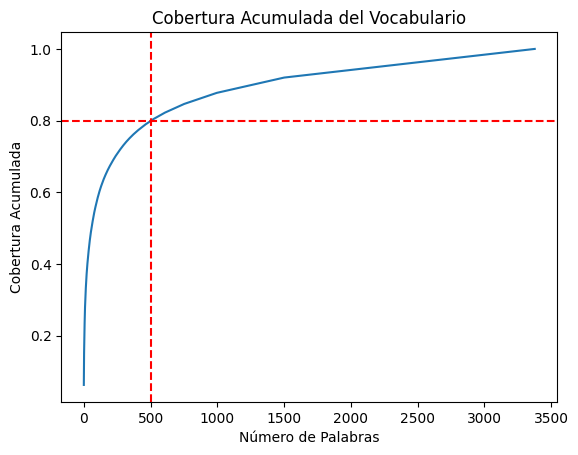

Vocabulario:
{'be': 0, 'the': 1, 'and': 2, 'it': 3, 'to': 4, 'this': 5, 'not': 6, 'of': 7, 'have': 8, 'in': 9, 'for': 10, 'that': 11, 'do': 12, 'with': 13, 'good': 14, 'very': 15, 'my': 16, 'you': 17, 'on': 18, 'but': 19, 'great': 20, 'movie': 21, 'phone': 22, 'film': 23, 'so': 24, 'all': 25, 'at': 26, 'bad': 27, 'like': 28, 'time': 29, 'one': 30, 'work': 31, 'go': 32, 'will': 33, 'just': 34, 'place': 35, 'would': 36, 'there': 37, 'get': 38, 'food': 39, 'service': 40, 'make': 41, 'we': 42, 'if': 43, 'can': 44, 'from': 45, 'really': 46, 'an': 47, 'they': 48, 'your': 49, 'no': 50, 'use': 51, 'about': 52, 'or': 53, 'only': 54, 'love': 55, 'here': 56, 'ever': 57, 'well': 58, 'best': 59, 'even': 60, 'out': 61, 'also': 62, 'could': 63, 'back': 64, 'up': 65, 'by': 66, 'think': 67, 'than': 68, 'when': 69, 'recommend': 70, 'more': 71, 'see': 72, 'me': 73, 'say': 74, 'he': 75, 'what': 76, 'come': 77, 'nice': 78, 'which': 79, 'look': 80, 'quality': 81, 'some': 82, 'much': 83, 'too': 84, 'after': 

In [289]:

diccionario = Counter()

for k in range(len(x_train)):
  diccionario.update(x_train[k])


print('Longitud del diccionario:', len(diccionario))
print('\n(word,frequency):')
print(diccionario.most_common(10))

palabras_ordenadas = frecuencia_tokens.most_common()
# Calcular la cobertura acumulada
frecuencias = [freq for _, freq in palabras_ordenadas]
total_frecuencias = sum(frecuencias)
cobertura_acumulada = [sum(frecuencias[:i+1]) / total_frecuencias for i in range(len(frecuencias))]

# Determinar el tamaño del vocabulario deseado
cobertura_deseada = 0.80
tamaño_vocabulario = next(i for i, cobertura in enumerate(cobertura_acumulada) if cobertura >= cobertura_deseada)

print(f"Tamaño del vocabulario para cubrir el {cobertura_deseada*100}%: {tamaño_vocabulario}")

# Visualización de la cobertura acumulada
plt.plot(cobertura_acumulada)
plt.xlabel('Número de Palabras')
plt.ylabel('Cobertura Acumulada')
plt.title('Cobertura Acumulada del Vocabulario')
plt.axhline(y=cobertura_deseada, color='r', linestyle='--')
plt.axvline(x=tamaño_vocabulario, color='r', linestyle='--')
plt.show()

# Crear el vocabulario
vocabulario = {palabra: idx for idx, (palabra, _) in enumerate(palabras_ordenadas[:tamaño_vocabulario])}

print("Vocabulario:")
print(vocabulario)




In [290]:
diccionario = Counter()

for k in range(len(x_train)):
  diccionario.update(x_train[k])


# Contar la frecuencia de cada token
frecuencia_tokens = Counter(diccionario)

# Definir el umbral de frecuencia
umbral_frecuencia = 2

# Filtrar palabras con frecuencia menor al umbral
frecuencia_filtrada = {token: freq for token, freq in frecuencia_tokens.items() if freq >= umbral_frecuencia}

# Ordenar palabras por frecuencia
palabras_ordenadas = sorted(frecuencia_filtrada.items(), key=lambda item: item[1], reverse=True)

# Filtrar palabras con frecuencia menor al umbral
vocabulario = {token: freq for token, freq in frecuencia_tokens.items() if freq >= umbral_frecuencia}

# Ordenar el vocabulario por frecuencia en orden descendente
vocabulario = dict(sorted(vocabulario.items(), key=lambda item: item[1], reverse=True))


print("Vocabulario:")
print(vocabulario)

Vocabulario:
{'be': 1476, 'the': 1353, 'and': 756, 'it': 586, 'to': 475, 'this': 451, 'not': 437, 'of': 422, 'have': 330, 'in': 280, 'for': 242, 'that': 234, 'do': 215, 'with': 201, 'good': 194, 'very': 179, 'my': 174, 'you': 162, 'on': 152, 'but': 145, 'great': 141, 'movie': 140, 'phone': 133, 'film': 127, 'so': 121, 'all': 104, 'at': 102, 'bad': 101, 'like': 100, 'time': 100, 'one': 98, 'work': 97, 'go': 89, 'will': 88, 'just': 87, 'place': 87, 'would': 85, 'there': 85, 'get': 84, 'food': 83, 'service': 83, 'make': 79, 'we': 75, 'if': 74, 'can': 72, 'from': 72, 'really': 71, 'an': 69, 'they': 66, 'your': 65, 'no': 65, 'use': 64, 'about': 61, 'or': 60, 'only': 58, 'love': 58, 'here': 56, 'ever': 56, 'well': 55, 'best': 54, 'even': 54, 'out': 54, 'also': 53, 'could': 52, 'back': 52, 'up': 52, 'by': 52, 'think': 51, 'than': 51, 'when': 50, 'recommend': 49, 'more': 49, 'see': 49, 'me': 48, 'say': 46, 'he': 46, 'what': 45, 'come': 45, 'nice': 45, 'which': 44, 'look': 44, 'quality': 42, 's

In [ ]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


lista_tokens = Counter()

for k in range(len(x_train)):
  lista_tokens.update(x_train[k])


# Contar la frecuencia de cada token
frecuencia_tokens = Counter(lista_tokens)

# Definir el umbral de frecuencia
umbral_frecuencia = 2

# Filtrar palabras con frecuencia menor al umbral
frecuencia_filtrada = {token: freq for token, freq in frecuencia_tokens.items() if freq >= umbral_frecuencia}

# Ordenar palabras por frecuencia
palabras_ordenadas = sorted(frecuencia_filtrada.items(), key=lambda item: item[1], reverse=True)

# Filtrar palabras con frecuencia menor al umbral
diccionario = {token: freq for token, freq in frecuencia_tokens.items() if freq >= umbral_frecuencia}

# Ordenar el diccionario por frecuencia en orden descendente
diccionario = dict(sorted(diccionario.items(), key=lambda item: item[1], reverse=True))


# Determinar el tamaño del vocabulario deseado
cobertura_deseada = 0.95
tamaño_vocabulario = next(i for i, cobertura in enumerate(cobertura_acumulada) if cobertura >= cobertura_deseada)

# Crear el vocabulario
vocabulario = {palabra: idx for idx, (palabra, _) in enumerate(diccionario[:tamaño_vocabulario])}

print("diccionario:")
print(diccionario)
print(vocabulario)


# *********** Aquí termina la sección de agregar código *************

TypeError: unhashable type: 'slice'

In [ ]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


None


# *********** Aquí termina la sección de agregar código *************

c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [ ]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************


In [ ]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

#**Pregunta - 5:**


a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de Google y Glove de Stanford.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++


#**Pregunta - 6:**

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el “valor” será su vector embebido de dimensión 300.

Este diccionario deberá ser del mismo tamaño que el vocabulario previo que hayas construido previamente.

Es recomendable que una vez que generes el nuevo vocabulario de vectores embebidos, guardes dicho diccionario en un archivo.

Recuerda borrar la variable donde descargaste los 2 millones de vectores embebidos Fasttext.



In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

#**Pregunta - 7:**



Generamos los vectores embebidos a paertir de los conjuntos de entrenamiento, validación y preuba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

#**Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************


In [ ]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

#**Pregunta - 9:**



Reporte del mejor modelo.


In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

#**Pregunta - 10:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++

##**Fin de la Actividad de vectores Embebidos - FastText**